# MachineLearing Project 01
# Binary Classification based on Logistic Regression



#### 20166450 YoungminKim

In [302]:
import matplotlib.pyplot as plt
from random import *
import numpy as np

## 1. Plot two clusters of points for training dateset

- Generate two sets of separable random point clusters in ${R}^2$

- Let $\{ x_i \}_{i=1}^n​ $ be a set of points and $\{ y_i \}_{i=1}^n$ be their corresponding labels
Plot the point clusters in the training dataset using different colors depending on their labels

In [621]:
s1=8
t1=4
s2=4
t2=8

In [622]:
x1_train=np.random.randn(100)
y1_train=np.random.randn(100)
x2_train=np.random.randn(100)
y2_train=np.random.randn(100)

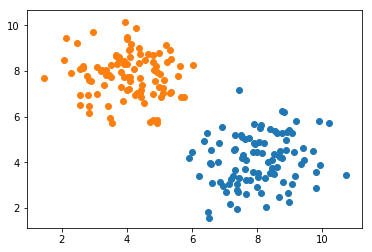

In [623]:
xy0_train=np.column_stack([s1-x1_train,t1-y1_train])
xy1_train=np.column_stack([s2-x2_train,t2-y2_train])
one_arr=np.array([1.0]*100)
xy0_train_plus1=np.column_stack([s1-x1_train,t1-y1_train,one_arr])
xy1_train_plus1=np.column_stack([s2-x2_train,t2-y2_train,one_arr])
plt.scatter(s1-x1_train,t1-y1_train)
plt.scatter(s2-x2_train,t2-y2_train)
plt.show()

## 2. Plot two clusters of points for testing dataset

- Generate two sets of separable random point clusters in ${R}^2$ for a testing dataset using the same centroid and the standard deviation of random generator as the training dataset

- Plot the point clusters in the testing dataset using different colors depending on their labels (different colors from the training dataset)

In [624]:
s1_test=8
t1_test=6
s2_test=6
t2_test=8

In [625]:
x1_test=np.random.randn(100)
y1_test=np.random.randn(100)
x2_test=np.random.randn(100)
y2_test=np.random.randn(100)

- Each of Tesing data sets is nearer than Training data sets. 
- Set it on purpose

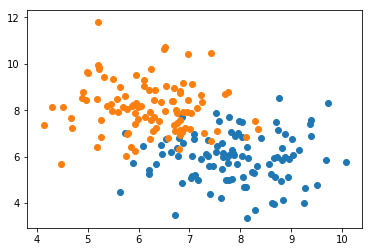

In [626]:
xy0_test=np.column_stack([s1_test-x1_test,t1_test-y1_test])
xy1_test=np.column_stack([s2_test-x2_test,t2_test-y2_test])
xy0_test_plus1=np.column_stack([s1_test-x1_test,t1_test-y1_test,one_arr])
xy1_test_plus1=np.column_stack([s2_test-x2_test,t2_test-y2_test,one_arr])
plt.scatter(s1_test-x1_test,t1_test-y1_test)
plt.scatter(s2_test-x2_test,t2_test-y2_test)
plt.show()

## 3. Plot the learning curves

- Apply the gradient descent algorithm
- Plot the training loss at every iteration
- Plot the testing loss at every iteration
- Plot the training accuracy at every iteration
- Plot the testing accuracy at every iteration

In [627]:
label0=0
label1=1

def sigmoid(z):
    return 1/(1+np.exp(-z))


def f_z(x,y):
    z=ux+vy+b
    return z


def h_func(xy,u,v,b):
    h=np.zeros(100)
    
    for i in range(len(xy)):
        z=u*xy[i][0]+v*xy[i][1]+b
        h[i]=sigmoid(z)
    
    return h


def cross_entropy(h,label):
    
    if(h==0 ):
        ln=10000.0
        f= -(label*ln+(1-label)*(np.log(1-h)))
        
    elif(h==1):
        ln=10000.0
        f= -(label*np.log(h)+(1-label)*ln)
        
    else:
        f= -(label*np.log(h)+(1-label)*(np.log(1-h)))
        
    return f


def cross_entropy_total(h_label0,h_label1,label0,label1):
    total=0
    for i in range(len(h_label0)):
        total+=cross_entropy(h_label0[i],label0)
    for i in range(len(h_label1)):
        total+=cross_entropy(h_label1[i],label1)
    
    return total/200




def partial_differential_of_total_cross_entropy(label0,label1,h_label0,h_label1,xy0,xy1):
    L=0

    for i in range(100):
        L+=(-(label0*(1-h_label0[i])*xy0[i]-(1-label0)*(h_label0[i])*xy0[i]))
    for i in range(100):
        L+=(-(label1*(1-h_label1[i])*xy1[i]-(1-label0)*(h_label1[i])*xy1[i]))
    
    L=L/200
        
    return L



- Function of accuracy comparing to real labels.

In [653]:
def accuracy_algorithms(h_label0,h_label1):
    label_h0=np.zeros(100)
    label_h1=np.zeros(100)
    right=0
    
    for i in range(100):
        if(h_label0[i]>=0.5):
            label_h0[i]=1
        else:
            label_h0[i]=0
            
        if(h_label1[i]>=0.5):
            label_h1[i]=1
        else:
            label_h1[i]=0
    
    for i in range(100):
        if(label_h0[i]==0):
            right+=1
        if(label_h1[i]==1):
            right+=1
            
    accuracy=right/180
    
    return accuracy

- Gradient Descent Algorithms! 

In [654]:
def gradient_descent_algorithms(label0,label1,h_label0,h_label1,xy0,xy1):
    learning_rate = 0.03
    u=0
    v=0
    b=0
    i=0
    total_new=0
    total=cross_entropy_total(h_label0,h_label1,label0,label1)
    iteration=0
    total_loss=np.zeros(100000)
    accuracy_array = np.zeros(100000)
    accuracy_array[0]=accuracy_algorithms(h_label0,h_label1)
    
    while abs(total_new-total)>0.000001:
        total=total_new
        u = u - learning_rate* partial_differential_of_total_cross_entropy(label0,label1,h_label0,h_label1,xy0[0],xy1[0])
        v = v - learning_rate* partial_differential_of_total_cross_entropy(label0,label1,h_label0,h_label1,xy0[1],xy1[1])
        b = b - learning_rate* partial_differential_of_total_cross_entropy(label0,label1,h_label0,h_label1,xy0[2],xy1[2])
        h_label0=h_func(xy0_train,u,v,b)
        h_label1=h_func(xy1_train,v,v,b)
#        print(h_label1)
        total_new=cross_entropy_total(h_label0,h_label1,label0,label1)
        total_loss[i]=total_new
        iteration+=1
        i+=1
        accuracy_array[i+1]=accuracy_algorithms(h_label0,h_label1)
        
    
    return total_loss,iteration,accuracy_array

- Training loss and accuracy.

In [655]:
h_label0_training=h_func(xy0_train,10,10,10)
h_label1_training=h_func(xy1_train,10,10,10)
training_total_loss,training_iteration,accuracy_array_train= gradient_descent_algorithms(label0,label1,h_label0_training,
                                                                    h_label1_training,xy0_train_plus1.T,xy1_train_plus1.T)



- Testing loss and accuracy.

In [656]:
h_label0_testing=h_func(xy0_test,10,10,10)
h_label1_testing=h_func(xy1_test,10,10,10)
testing_total_loss,testing_iteration,accuracy_array_test= gradient_descent_algorithms(label0,label1,h_label0_testing,
                                                                  h_label1_testing,xy0_test_plus1.T,xy1_test_plus1.T)


- Visualize each loss!

Text(0.5, 0, 'Iteraion')

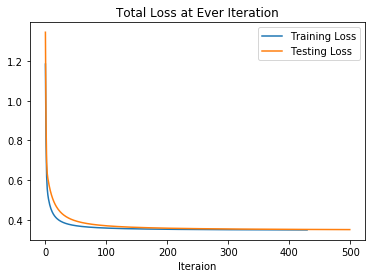

In [657]:
plt.plot(training_total_loss[:430],label='Training Loss')
plt.plot(testing_total_loss[:500],label='Testing Loss')
plt.legend(loc='upper right')
plt.title("Total Loss at Ever Iteration")
plt.xlabel("Iteraion")

- Visualize each Accuracy!

Text(0.5, 0, 'Iteraion')

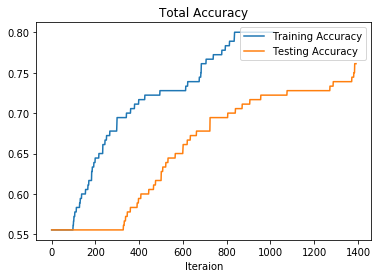

In [658]:
plt.plot(accuracy_array_train[100:1115],label='Training Accuracy')
plt.plot(accuracy_array_test[100:1492],label='Testing Accuracy')
plt.legend(loc='upper right')
plt.title("Total Accuracy")
plt.xlabel("Iteraion")